In [6]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [7]:
import pandas as pd

# Load the Spark output file
file_path = "gs://dataproc-staging-us-east1-484410736875-hru3bcdb/clusters.csv/part-00000-02ad663f-9707-494a-aca4-35fdcc392e4b-c000.csv"  

# Load into pandas (Spark writes without header)
df = pd.read_csv(file_path, header=None)

# Assign proper column names
df.columns = ["Type_1", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Generation", "Legendary", "cluster"]

# Show preview
df.head()


,Type_1,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,cluster
0,Grass,45,49,49,65,65,45,1,False,5
1,Grass,60,62,63,80,80,60,1,False,1
2,Grass,80,82,83,100,100,80,1,False,2
3,Grass,80,100,123,122,120,80,1,False,3
4,Fire,39,52,43,60,50,65,1,False,5


In [8]:
from sklearn.manifold import TSNE
import numpy as np

# Extract the stat features as input for t-SNE
X = df[["HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]].values

# Run t-SNE (this may take 10–20 seconds)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X)

# Add t-SNE results to the DataFrame
df["tsne1"] = tsne_result[:, 0]
df["tsne2"] = tsne_result[:, 1]


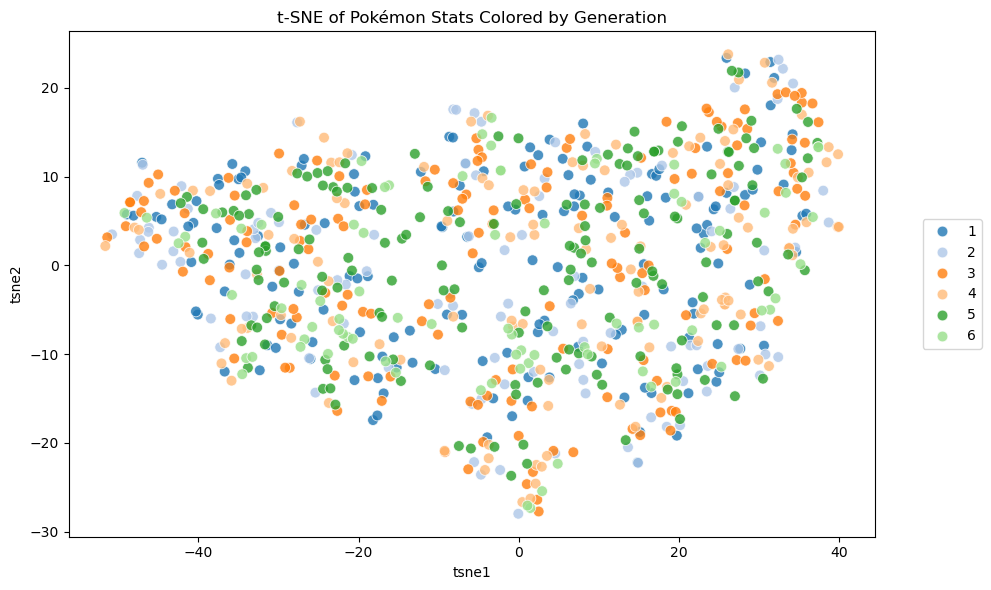

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="tsne1", y="tsne2", hue="Generation", palette="tab20", s=60, alpha=0.8)
plt.title("t-SNE of Pokémon Stats Colored by Generation")
plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()


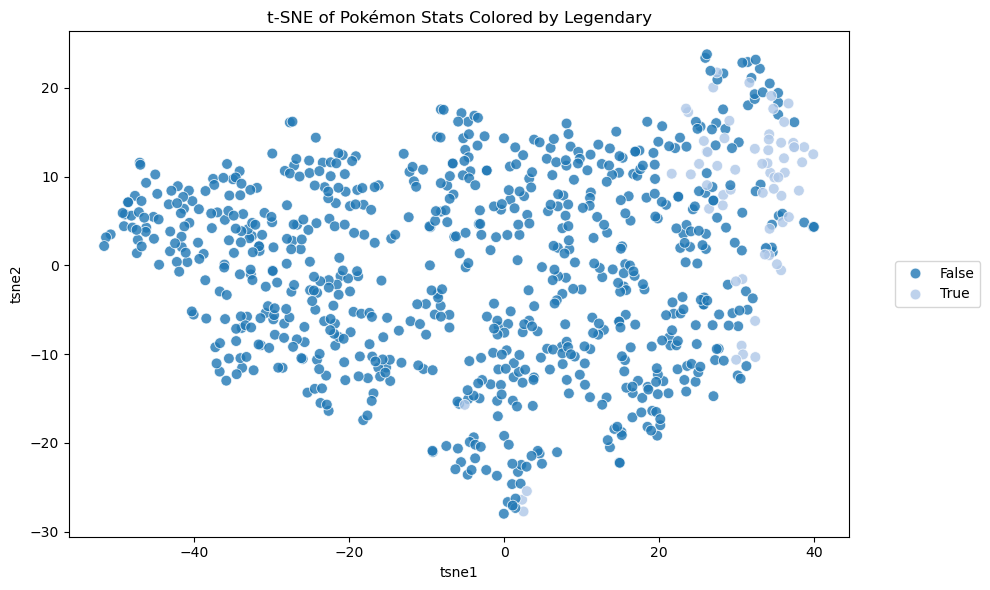

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="tsne1", y="tsne2", hue="Legendary", palette="tab20", s=60, alpha=0.8)
plt.title("t-SNE of Pokémon Stats Colored by Legendary")
plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()

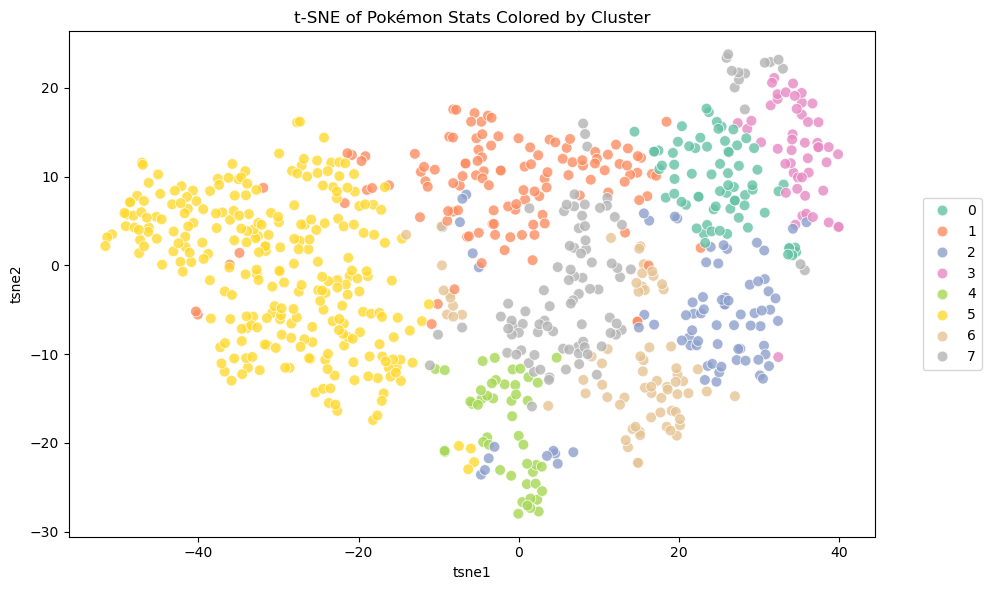

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="tsne1", y="tsne2", hue="cluster", palette="Set2", s=60, alpha=0.8)
plt.title("t-SNE of Pokémon Stats Colored by Cluster")
plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()
